<a href="https://colab.research.google.com/github/kangkwanghyup/2022test/blob/main/2%EC%B0%A8%EC%8B%9C_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%8D%B0%EC%9D%B4%ED%84%B0_2%EC%A7%84%EB%B6%84%EB%A5%98_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 이미지 웹크롤링
[링크 텍스트](https://https://duckduckgo.com/?t=h_)




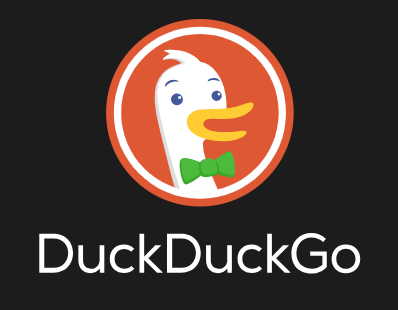

In [ ]:
!pip install jmd_imagescraper

In [ ]:
from jmd_imagescraper.core import *
from pathlib import Path
# 현재 작업 디렉토리에 "images" 서브 디렉토리를 생성하고 그것을 root로 설정합니다.
root = Path().cwd() / "images"

# BTS 사진을 다운로드합니다. 검색어로 "BTS"를 사용하고 원하는 이미지 수를 지정할 수 있습니다.
duckduckgo_search(root, "BTS","BTS사진", max_results=300)

In [ ]:
# NEWJEANS 사진을 다운로드합니다. 검색어로 "BTS"를 사용하고 원하는 이미지 수를 지정할 수 있습니다.
duckduckgo_search(root, "NEWJEANS","뉴진스사진", max_results=300)

2. train-test-split

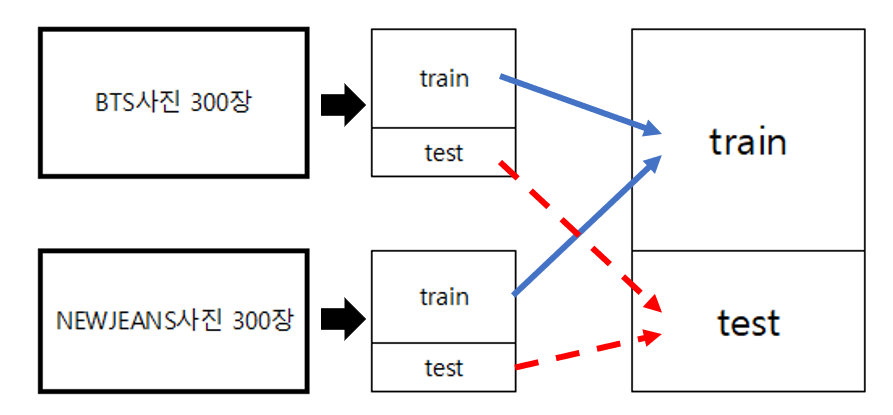

In [ ]:
import os
import shutil
import random

# 원본 이미지가 있는 디렉토리 경로
source_dir = "/content/images/BTS"

# train 폴더와 test 폴더 경로
train_dir = "/content/images/train/BTS"
test_dir = "/content/images/test/BTS"

# train과 test 폴더가 없으면 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(source_dir) if f.endswith(".jpg")]

# 이미지 파일을 무작위로 섞기
random.shuffle(image_files)

# train 폴더로 80% 복사
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

for image_file in image_files[:split_index]:
    source_path = os.path.join(source_dir, image_file)
    target_path = os.path.join(train_dir, image_file)
    shutil.copy(source_path, target_path)

# test 폴더로 나머지 20% 복사
for image_file in image_files[split_index:]:
    source_path = os.path.join(source_dir, image_file)
    target_path = os.path.join(test_dir, image_file)
    shutil.copy(source_path, target_path)

print("BTS 이미지 분할이 완료되었습니다.")
!rm -rf "/content/images/BTS"

In [ ]:
# 원본 이미지가 있는 디렉토리 경로
source_dir_N = "/content/images/NEWJEANS"

# train 폴더와 test 폴더 경로
train_dir = "/content/images/train/NEWJEANS"
test_dir = "/content/images/test/NEWJEANS"

# train과 test 폴더가 없으면 생성
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(source_dir_N) if f.endswith(".jpg")]

# 이미지 파일을 무작위로 섞기
random.shuffle(image_files)

# train 폴더로 80% 복사
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

for image_file in image_files[:split_index]:
    source_path = os.path.join(source_dir_N, image_file)
    target_path = os.path.join(train_dir, image_file)
    shutil.copy(source_path, target_path)

# test 폴더로 나머지 20% 복사
for image_file in image_files[split_index:]:
    source_path = os.path.join(source_dir_N, image_file)
    target_path = os.path.join(test_dir, image_file)
    shutil.copy(source_path, target_path)

print("뉴진스 이미지 분할이 완료되었습니다.")
!rm -rf "/content/images/NEWJEANS"

이미지 몇개인지

In [ ]:
# 이미지 파일이 들어있는 폴더 경로
image_dir ='/content/images/test/BTS'
# 이미지 파일 목록 가져오기
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg'))]

# 이미지 파일 개수 출력
num_images = len(image_files)
print(num_images)


In [ ]:
#!rm -rf "/content/images"     #directory 데이터 삭제

3. CNN모델



In [9]:
# 필요한 패키지와 모듈을 불러옴
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
training_dir = '/content/images/train'
validation_dir = '/content/images/test'

이미지 데이터 전처리(데이터 증식)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 전체 이미지를 1./255로 스케일을 조정합니다.
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    batch_size=20,
    target_size=(300, 300),
    class_mode='binary'
)

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    target_size=(300, 300),
    class_mode='binary')

In [ ]:
import matplotlib.pyplot as plt

# train_generator에서 10개의 이미지 배치를 가져옵니다.
images, labels = next(train_generator)

# 이미지 배치를 시각화합니다.
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2x5 그리드에서 i번째 subplot을 설정합니다.
    plt.imshow(images[i])      # 이미지를 표시합니다.
    plt.title(f"Class: {labels[i]}")  # 레이블을 제목으로 표시합니다.

plt.tight_layout()
plt.show()


In [ ]:
print(train_generator.class_indices)

In [ ]:
#타겟데이터 값이랑 같이 확인하기
def findKey(indices, search_value):
    for key, value in indices.items():
        if(value == search_value):
            return key
    return -1

# validation dataset 에서 샘플 데이터를 display 해본다.
for X_batch, y_batch in validation_generator:
    plt.figure(figsize=(20,20))
    # create a grid of 4x4 images
    for i in range(0, 16):
        ax = plt.subplot(4, 4, i+1)
        ax.set_title(findKey(validation_generator.class_indices, y_batch[i]))   # 이미지의 label name 을 찾아온다
        plt.imshow((X_batch[i].reshape(300, 300, 3)*255).astype(np.uint8)) # train 샘플 이미지를 보여준다.
    # show the plot
    plt.show()
    break

모델구축하기

In [16]:
# 필요한 패키지와 모듈을 불러옴
import math
import os
import cv2
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from PIL import Image
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Model, layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.regularizers import l2

모델 1

In [ ]:
##모델 1
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(300, 300, 3),
                 name="conv1"))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', name="conv2"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool1"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name="conv3"))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', name="conv4"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool2"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name="conv5"))
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', name="conv6"))
model.add(MaxPooling2D(pool_size=(3, 3), name="maxpool3"))
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001), bias_regularizer=l2(0.001)))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0001),
              metrics=['accuracy'])

model.summary()

In [ ]:
# # model training(모델을 학습시킵니다)
hist = model.fit_generator(generator=train_generator,
                    epochs=30,
                    validation_data=validation_generator
                   )

모델 2

In [ ]:
##모델 2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',
                           input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

In [ ]:
hist=model.fit(train_generator,
                      epochs=30,
          validation_data=validation_generator)

학습 결과 확인하기

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],  label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],  label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
# model evaluate(모델을 평가해 봅니다)
score = model.evaluate(validation_generator, steps=800//10, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

In [ ]:
# 전체 모델을 H5 파일로 저장합니다
model.save('Binary classification ac80.h5')
print("Saved model to disk")

예측하기

In [39]:
!rm -rf "/content/files"       #파일제거하기

In [ ]:
from google.colab import files
import os

# 업로드할 이미지 파일을 선택합니다.
uploaded = files.upload()

# "files" 폴더가 없으면 생성합니다.
os.makedirs("files", exist_ok=True)

# 업로드한 이미지 파일을 "files" 폴더에 저장합니다.
for filename in uploaded.keys():
    with open(os.path.join("files", filename), "wb") as f:
        f.write(uploaded[filename])
        print(f"{filename}이(가) 성공적으로 업로드되었습니다.")

In [28]:

# 디렉토리에서 이미지 파일들을 읽어오는 함수 정의
def get_images(directory):
    Images = []
    pred_img_cnt = 10  # 예측할 이미지를 몇개 불러 올 것인지 설정
    i = 0
    for image_file in os.listdir(directory):          # 디렉토리로부터 파일을 하나하나 불러 온다
        i += 1
        if i > pred_img_cnt: break
        else:
             image = cv2.imread(directory+r'/'+image_file) # 불러온 이미지를 openCV 로 읽어 들인다
             image = cv2.resize(image,(300,300))           # 이미지 크기 재조정
             Images.append(image)

    return Images

In [ ]:
pred_images = get_images('/content/files')
pred_images = np.array(pred_images) * (1./255)
pred_images.shape

In [ ]:
prediction = model.predict(pred_images, verbose=1)

In [ ]:
print(validation_generator.class_indices)

In [ ]:
prediction

In [33]:
import os

# 이미지 파일이 있는 디렉토리 경로 (실제 디렉토리 경로로 수정)
image_dir = "/content/files"

# 이미지 파일 목록을 저장할 리스트 초기화
image_paths = []

# 디렉토리에서 이미지 파일 찾기
for filename in os.listdir(image_dir):
    if filename.endswith(('.jpg', '.jpeg', '.png', '.gif', '.bmp', 'jfif')):
        image_path = os.path.join(image_dir, filename)
        image_paths.append(image_path)



In [ ]:
print(image_paths)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image



for fn in image_paths:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()

    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img) * 1./255
    x = np.expand_dims(x, axis=0)
    classes = model.predict(x)

    print('모델 출력:', classes[0][0])

    if classes[0][0] > 0.5:
        print(fn + "는 NEWJEANS입니다.")
    elif classes[0][0] < 0.5:
        print(fn + "는 BTS입니다.")
    else:
        print(fn + "인식불가")
    print('----------------------------------------------------------')

전이학습 활용하기
#다른 사람이 만든 파라미터를 활용하여 예측하기

In [36]:
#모델불러오기, 전이학습 (저장된 파라미터 사용)
import tensorflow as tf
from tensorflow import keras
new_model=keras.models.load_model(' ')

In [ ]:
pred2=new_model.predict(pred_images, verbose=1)
pred2

In [ ]:
for fn in image_paths:
    # 이미지 출력
    plt.imshow(mpimg.imread(fn))
    plt.show()

    # 이미지 불러오기
    img = tf.keras.utils.load_img(fn, target_size=(300, 300))
    x = tf.keras.utils.img_to_array(img) * 1./255
    x = np.expand_dims(x, axis=0)
    classes = new_model.predict(x)

    print('모델 출력:', classes[0][0])

    if classes[0][0] > 0.5:
        print(fn + "는 NEWJEANS입니다.")
    elif classes[0][0] < 0.5:
        print(fn + "는 BTS입니다.")
    else:
        print(fn + "인식불가")
    print('----------------------------------------------------------')